# Exercício 1

![alt text](imagens/enunciado/Enunciado_1.png)

In [34]:
import time
import numpy as np
import matplotlib.pyplot as plt

# a) Funções para cálculo da soma

def soma_iterativa(N):
    total = 0
    for i in range(1, N + 1):
        total += i
    return total

def soma_analitica(N):
    return N * (N + 1) // 2

lista_numeros = [10**6, 10**7, 10**8] #Numeros para teste 
lista_tempos_iterativos = [] #Lista para armazenar tempos de execução da soma iterativa
lista_tempos_analiticos = [] #Lista para armazenar tempos de execução da soma analítica 

for num in lista_numeros:
    start = time.time()
    soma_iterativa(num)
    stop = time.time()
    print(f"Soma iterativa para N={num}: {stop - start:.6f} segundos")
    lista_tempos_iterativos.append(stop - start)

    start = time.time()
    soma_analitica(num)
    stop = time.time()
    print(f"Soma analítica para N={num}: {stop - start:.6f} segundos\n")
    lista_tempos_analiticos.append(stop - start)


Soma iterativa para N=1000000: 0.102131 segundos
Soma analítica para N=1000000: 0.000000 segundos

Soma iterativa para N=10000000: 0.437553 segundos
Soma analítica para N=10000000: 0.000000 segundos

Soma iterativa para N=100000000: 4.467725 segundos
Soma analítica para N=100000000: 0.000000 segundos



In [35]:
# b) Funções para soma com listas
def soma_com_for(lista):
    total = 0
    for num in lista:
        total += num
    return total

def soma_com_sum(lista):
    return sum(lista)

# Criando a lista dos tempos
lista_tempos_for = []
lista_tempos_sum = []

# criando a lista dos numeros
lista = list(range(1, 10**6 + 1))

# Para 10**6
# soma com o for
start = time.time()
soma_com_for(lista)
stop = time.time()
print(f"Soma com for para N=10^6: {stop - start:.6f} segundos")
lista_tempos_for.append(stop - start)

# soma com o sum
start = time.time()
soma_com_sum(lista)
stop = time.time()
print(f"Soma com sum para N=10^6: {stop - start:.6f} segundos\n")
lista_tempos_sum.append(stop - start)

# criando a lista
lista = list(range(1, 10**7 + 1))

#Para 10**7
# soma com o for
start = time.time()
soma_com_for(lista)
stop = time.time()
print(f"Soma com for para N=10^7: {stop - start:.6f} segundos")
lista_tempos_for.append(stop - start)

# soma com o sum
start = time.time()
soma_com_sum(lista)
stop = time.time()
print(f"Soma com sum para N=10^7: {stop - start:.6f} segundos\n")
lista_tempos_sum.append(stop - start)


Soma com for para N=10^6: 0.035392 segundos
Soma com sum para N=10^6: 0.023369 segundos

Soma com for para N=10^7: 0.365274 segundos
Soma com sum para N=10^7: 0.321085 segundos



Resposta B:A função sum() é implementada em C (código nativo do Python), evitando a sobrecarga de interpretação de bytecode Python em loops. 

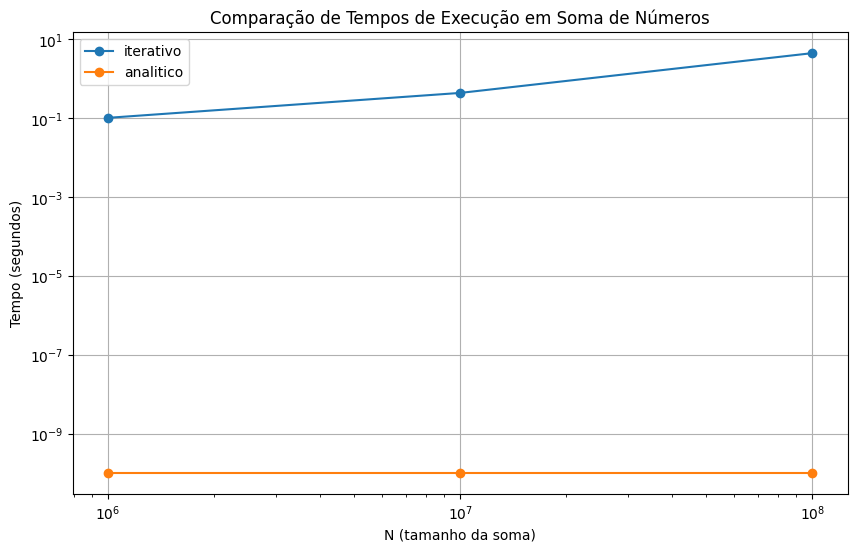

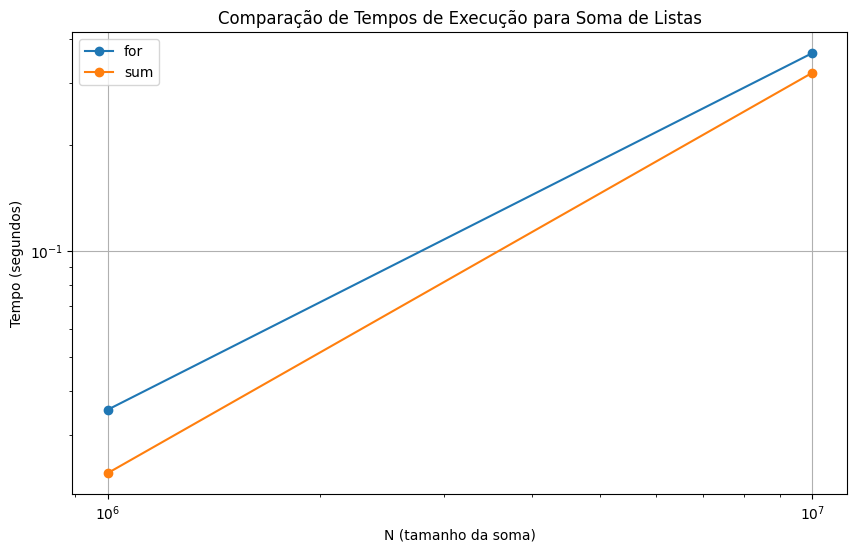

In [36]:
# c) Geração do gráfico log-log

#OBS: Alterei o tempo analitico porque log(0) é indefinido
# Defini o tempo analitico para um numero muito pequeno
lista_tempos_analiticos = [1e-10, 1e-10, 1e-10]  # Valores fictícios para evitar log(0)

resultados_enunciado_a = {    
    "iterativo": lista_tempos_iterativos,
    "analitico": lista_tempos_analiticos
}

plt.figure(figsize=(10, 6))
for key, tempos in resultados_enunciado_a.items():
    plt.plot(lista_numeros, tempos, marker='o', label=key)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (tamanho da soma)')
plt.ylabel('Tempo (segundos)')
plt.title('Comparação de Tempos de Execução em Soma de Números')
plt.legend()
plt.grid(True)
plt.show()


resultados_enunciado_b = {
    "for": lista_tempos_for,
    "sum": lista_tempos_sum
}
plt.figure(figsize=(10, 6))
for key, tempos in resultados_enunciado_b.items():
    plt.plot([10**6, 10**7], tempos, marker='o', label=key)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (tamanho da soma)')
plt.ylabel('Tempo (segundos)')
plt.title('Comparação de Tempos de Execução para Soma de Listas')
plt.legend()
plt.grid(True)
plt.show()


NumPy (N=1000000): 0.007998 segundos
NumPy (N=10000000): 0.086994 segundos


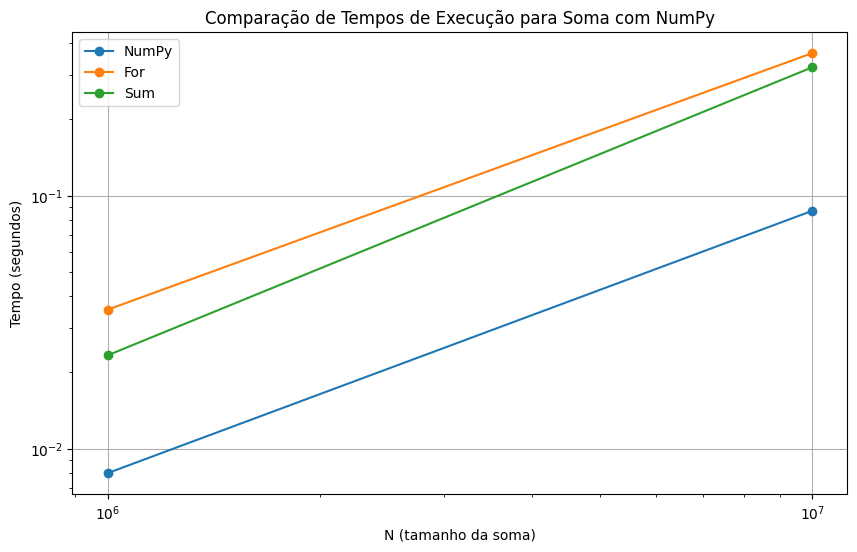

In [37]:
# d) Versão vetorizada com NumPy
def soma_numpy(N):
    arr = np.arange(1, N + 1, dtype=np.int64)
    return np.sum(arr)

tempos_numpy = []

for N in [10**6, 10**7]:
    start = time.time()
    soma_numpy(N) 
    end = time.time()
    if N <= 10**7:
        print(f"NumPy (N={N}): {end - start:.6f} segundos")
    tempos_numpy.append(end - start)

# grafico de comparação
plt.figure(figsize=(10, 6))
plt.plot([10**6, 10**7], tempos_numpy, marker='o', label='NumPy')
plt.plot([10**6, 10**7], lista_tempos_for, marker='o', label='For')
plt.plot([10**6, 10**7], lista_tempos_sum, marker='o', label='Sum')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (tamanho da soma)')
plt.ylabel('Tempo (segundos)')
plt.title('Comparação de Tempos de Execução para Soma com NumPy')
plt.legend()
plt.grid(True)
plt.show()


Porque o Numpy é mais rápido?

1. Operações Vetorizadas: Executa cálculos em blocos de memória contíguos

2. Código Compilado: Implementação em C/Fortran com paralelização

3. Baixa Sobrecarga: Evita verificações de tipo em tempo de execução

# Exercício 2

![alt text](imagens/enunciado/Enunciado_2.png)

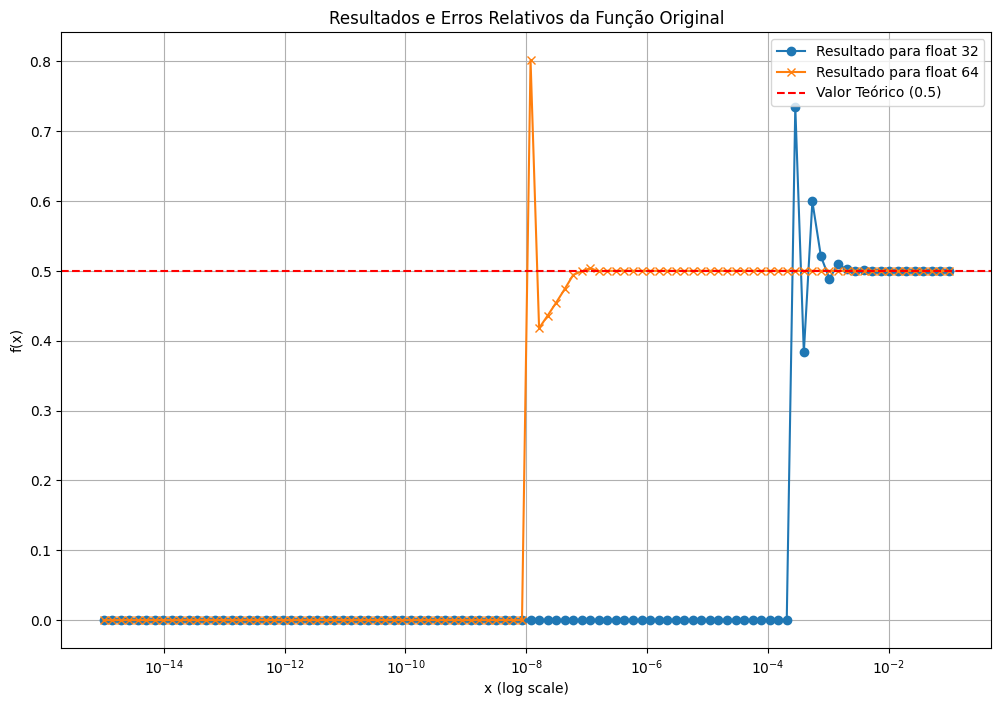

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

# a) Função original com problema numérico
def f_original(x):
    return (1 - np.cos(x)) / (x**2)

# x variando em torno de 0 de 10**-1 ate 10**-15
x_values_float32 = np.logspace(-1, -15, num=100, base=10, dtype=np.float32)
x_values_float64 = np.logspace(-1, -15, num=100, base=10, dtype=np.float64)

resultados_float32 = f_original(x_values_float32)
resultados_float64 = f_original(x_values_float64)

valor_teorico = 0.5 # Valor teórico esperado 

# gerar o grafico:
plt.figure(figsize=(12, 8))
plt.plot(x_values_float32, resultados_float32, label='Resultado para float 32', marker='o')
plt.plot(x_values_float64, resultados_float64, label='Resultado para float 64', marker='x')
plt.xlabel('x (log scale)')
plt.ylabel('f(x)')
plt.xscale('log')
plt.axhline(y=valor_teorico, color='r', linestyle='--', label='Valor Teórico (0.5)')


plt.title('Resultados e Erros Relativos da Função Original')
plt.legend()
plt.grid(True)
plt.show()



Quanto mais próximo de 0, os resultados começam a divergir do valor teorico.

O float64 lida melhor com numeros decimais, porém ainda tem um limite, e ainda sofre com a perda de digitos significativos e não consegue calcular o valor corretamente

C:\Users\vinic\AppData\Local\Temp\ipykernel_9424\1511574678.py:3: RuntimeWarning: invalid value encountered in divide
  return (2 * np.sin(x/2)**2) / (x**2)


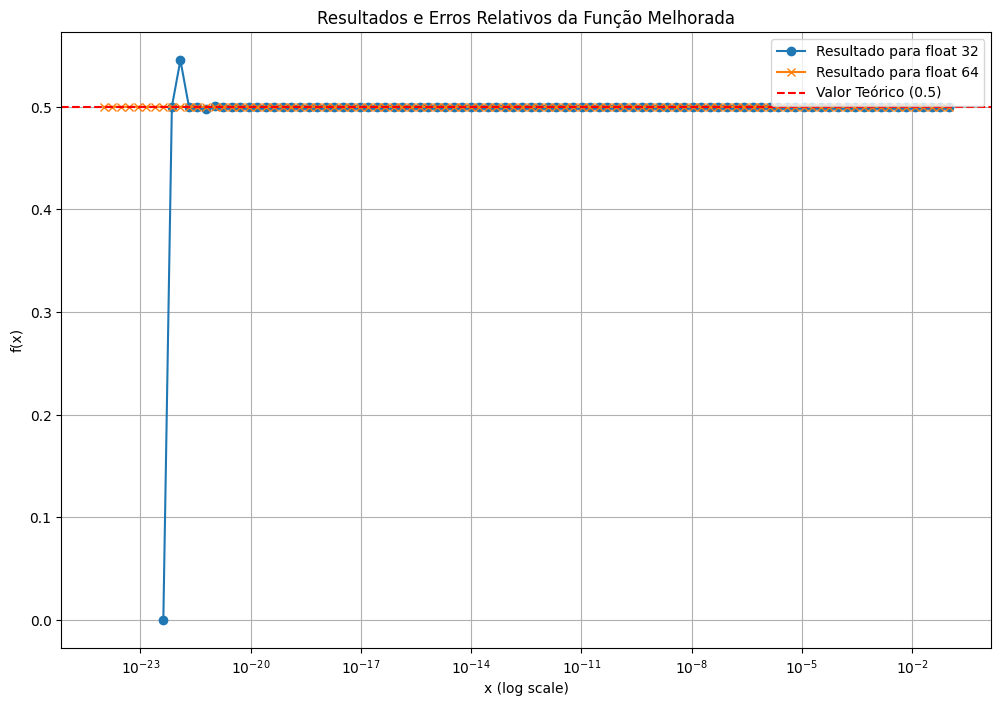

In [23]:
# b) Função melhorada com identidade trigonométrica
def f_melhorada(x):
    return (2 * np.sin(x/2)**2) / (x**2)

# Gerar valores de x de 10^{-1} até 10^{-24}
x_values_float32 = np.logspace(-1, -24, num=100, base=10, dtype=np.float32)
x_values_float64 = np.logspace(-1, -24, num=100, base=10, dtype=np.float64)

#calcular os resultados

resultados_float32 = f_melhorada(x_values_float32)
resultados_float64 = f_melhorada(x_values_float64)

# Valor teórico esperado
valor_teorico = 0.5

#Gerar o gráfico de comparação
plt.figure(figsize=(12, 8))
plt.plot(x_values_float32, resultados_float32, label='Resultado para float 32', marker='o')
plt.plot(x_values_float64, resultados_float64, label='Resultado para float 64', marker='x')
plt.axhline(y=valor_teorico, color='r', linestyle='--', label='Valor Teórico (0.5)')
plt.xlabel('x (log scale)')
plt.ylabel('f(x)')
plt.xscale('log')
plt.title('Resultados e Erros Relativos da Função Melhorada')
plt.legend()
plt.grid(True)
plt.show()

Não houve diferença entre o float 32 e 64

In [ ]:
# c) Exemplo de cancelamento catastrófico

a = 1.0
b = 1.0000000000000000001
resultado = a - b

print("Resultado do cancelamento catastrófico:", resultado)

Resultado do cancelamento catastrófico: 0.0


Um exemplo de cancelamento catastrófico ocorre quando subtraímos dois números de ponto flutuante muito próximos, resultando em perda de dígitos significativos e amplificação de erros de arredondamento.

In [ ]:
#D) Foi implementado nos codigos anteriores

O float64 possui uma precisão maior do que o float 32, em contrapartida, ele consome mais memoria e poder computacional

# Exercício 3

![alt text](imagens/enunciado/Enunciado_3.png)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import math

# a) 
def f(x):
    return np.exp(-x**2)

def riemann_esquerda(n, dtype):
    a, b = 0, 1
    dx = dtype((b - a) / n)
    x = np.linspace(a, b, n, endpoint=False, dtype=dtype)
    return np.sum(f(x)) * dx

#Parametros iniciais 
#a = 0
#b = 1
n = [10**2, 10**3, 10**4]

# Criar os arrays de x para float32 e float64
x_values_float32 = np.logspace(2, 4, num=100, base=10, dtype=np.float32)
x_values_float64 = np.logspace(2, 4, num=100, base=10, dtype=np.float64)

resultados_riemann_esquerda_float32 = []
resultados_riemann_esquerda_float64 = []
# Calcular os resultados para diferentes n
for i in range(len(n)):
    resultado_float32 = riemann_esquerda(n[i], np.float32)
    resultado_float64 = riemann_esquerda(n[i], np.float64)
    resultados_riemann_esquerda_float32.append(resultado_float32)
    resultados_riemann_esquerda_float64.append(resultado_float64) 
    
    print(f"Resultado para float32 com n={n[i]}: {resultado_float32}")
    print(f"Resultado para float64 com n={n[i]}: {resultado_float64}\n")

Resultado para float32 com n=100: 0.7499785423278809
Resultado para float64 com n=100: 0.7499786042621126

Resultado para float32 com n=1000: 0.7471401691436768
Resultado para float64 com n=1000: 0.747140131778599

Resultado para float32 com n=10000: 0.7468556761741638
Resultado para float64 com n=10000: 0.746855738227236



In [59]:
# Diferentes funções de riemann

def riemann_esquerda(n, dtype):
    a, b = 0, 1
    dx = dtype((b - a) / n)
    x = np.linspace(a, b, n, endpoint=False, dtype=dtype)
    return np.sum(f(x)) * dx

def riemann_direita(n, dtype):
    a, b = 0, 1
    dx = dtype((b - a) / n)
    total = dtype(0)
    for i in range(1, n+1):
        x = dtype(a + i * dx)
        total += f(x) * dx
    return total

def riemann_meio(n, dtype):
    a, b = 0, 1
    dx = dtype((b - a) / n)
    total = dtype(0)
    for i in range(n):
        x = dtype(a + (i + 0.5) * dx)
        total += f(x) * dx
    return total

def trapezio(n, dtype):
    a, b = 0, 1
    dx = dtype((b - a) / n)
    total = dtype(0)
    for i in range(n+1):
        x = dtype(a + i * dx)
        peso = 1.0 if i in (0, n) else 2.0
        total += f(x) * peso * dx / 2
    return total

def calcular_resultados(n, funcao, dtype):
    resultados = []
    for i in range(len(n)):
        resultado = funcao(n[i], dtype)
        resultados.append(resultado)
    return resultados

#Parametros iniciais 
a = 0
b = 1
n = [10**2, 10**3, 10**4]
#n = [10**2, 10**3, 10**4, 10**5, 10**6]
valor_referencial = 0.746824

# Calcular os resultados 
for i in range(1, 4):
    resultados_riemann_esquerda_float32 = calcular_resultados(n, riemann_esquerda, np.float32)
    resultados_riemann_esquerda_float64 = calcular_resultados(n, riemann_esquerda, np.float64)
    resultados_riemann_direita_float32 = calcular_resultados(n, riemann_direita, np.float32)
    resultados_riemann_direita_float64 = calcular_resultados(n, riemann_direita, np.float64)
    resultados_riemann_meio_float32 = calcular_resultados(n, riemann_meio, np.float32)
    resultados_riemann_meio_float64 = calcular_resultados(n, riemann_meio, np.float64)
    resultados_trapezio_float32 = calcular_resultados(n, trapezio, np.float32)
    resultados_trapezio_float64 = calcular_resultados(n, trapezio, np.float64)

# Calcular os erros absolutos 
erros_riemann_esquerda_float32 = [abs(res - valor_referencial) for res in resultados_riemann_esquerda_float32]
erros_riemann_esquerda_float64 = [abs(res - valor_referencial) for res in resultados_riemann_esquerda_float64]
erros_riemann_direita_float32 = [abs(res - valor_referencial) for res in resultados_riemann_direita_float32]
erros_riemann_direita_float64 = [abs(res - valor_referencial) for res in resultados_riemann_direita_float64]
erros_riemann_meio_float32 = [abs(res - valor_referencial) for res in resultados_riemann_meio_float32]
erros_riemann_meio_float64 = [abs(res - valor_referencial) for res in resultados_riemann_meio_float64]
erros_trapezio_float32 = [abs(res - valor_referencial) for res in resultados_trapezio_float32]
erros_trapezio_float64 = [abs(res - valor_referencial) for res in resultados_trapezio_float64]



#Imprimir os resultados dos erros absolutos para cada n:
for i in range(len(n)):
    print(f"Erro absoluto Riemann Esquerda (float32) para n={n[i]}: {erros_riemann_esquerda_float32[i]}")
    print(f"Erro absoluto Riemann Esquerda (float64) para n={n[i]}: {erros_riemann_esquerda_float64[i]}")
    print(f"Erro absoluto Riemann Direita (float32) para n={n[i]}: {erros_riemann_direita_float32[i]}")
    print(f"Erro absoluto Riemann Direita (float64) para n={n[i]}: {erros_riemann_direita_float64[i]}")
    print(f"Erro absoluto Riemann Meio (float32) para n={n[i]}: {erros_riemann_meio_float32[i]}")
    print(f"Erro absoluto Riemann Meio (float64) para n={n[i]}: {erros_riemann_meio_float64[i]}")
    print(f"Erro absoluto Trapezio (float32) para n={n[i]}: {erros_trapezio_float32[i]}")
    print(f"Erro absoluto Trapezio (float64) para n={n[i]}: {erros_trapezio_float64[i]}\n")

Erro absoluto Riemann Esquerda (float32) para n=100: 0.0031545162200927734
Erro absoluto Riemann Esquerda (float64) para n=100: 0.003154604262112559
Erro absoluto Riemann Direita (float32) para n=100: 0.003166496753692627
Erro absoluto Riemann Direita (float64) para n=100: 0.0031666013261727466
Erro absoluto Riemann Meio (float32) para n=100: 3.0994415283203125e-06
Erro absoluto Riemann Meio (float64) para n=100: 3.198492319667068e-06
Erro absoluto Trapezio (float32) para n=100: 5.900859832763672e-06
Erro absoluto Trapezio (float64) para n=100: 5.998532029982684e-06

Erro absoluto Riemann Esquerda (float32) para n=1000: 0.0003161430358886719
Erro absoluto Riemann Esquerda (float64) para n=1000: 0.00031613177859890484
Erro absoluto Riemann Direita (float32) para n=1000: 0.000316619873046875
Erro absoluto Riemann Direita (float64) para n=1000: 0.00031598878022975896
Erro absoluto Riemann Meio (float32) para n=1000: 2.384185791015625e-07
Erro absoluto Riemann Meio (float64) para n=1000: 1

Poderia haver uma melhora no codigo acima, mas eu não vou ter tempo de implementar

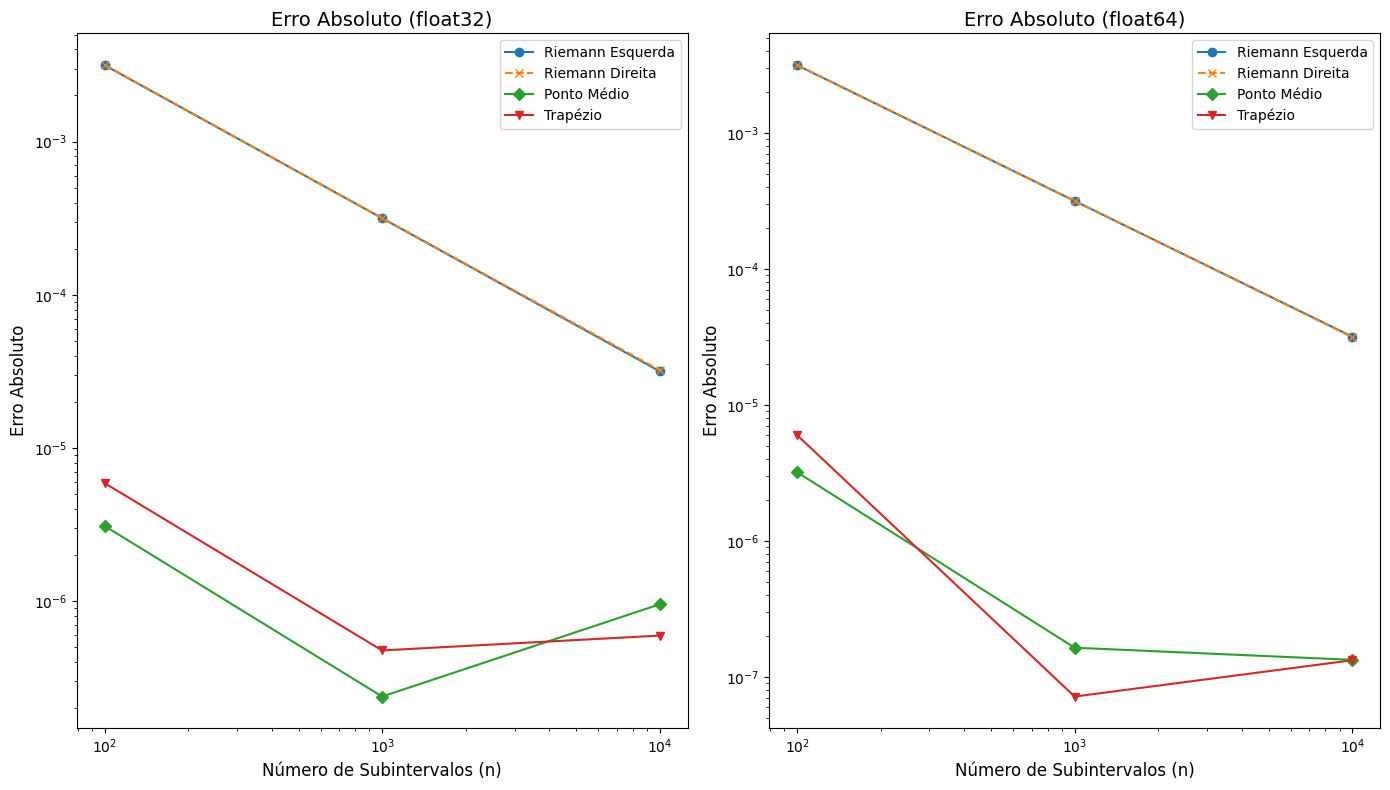

In [60]:
#c) Gráfico de evolução dos erros

# Configurações do gráfico
plt.figure(figsize=(14, 8))

# Gráfico para float32
plt.subplot(1, 2, 1)
plt.loglog(n, erros_riemann_esquerda_float32, 'o-', label='Riemann Esquerda')
plt.loglog(n, erros_riemann_direita_float32, 'x--', label='Riemann Direita')
plt.loglog(n, erros_riemann_meio_float32, 'D-', label='Ponto Médio')
plt.loglog(n, erros_trapezio_float32, 'v-', label='Trapézio')

plt.title('Erro Absoluto (float32)', fontsize=14)
plt.xlabel('Número de Subintervalos (n)', fontsize=12)
plt.ylabel('Erro Absoluto', fontsize=12)

plt.legend()
plt.xticks(n, [f'$10^{int(np.log10(i))}$' for i in n])

# Gráfico para float64
plt.subplot(1, 2, 2)
plt.loglog(n, erros_riemann_esquerda_float64, 'o-', label='Riemann Esquerda')
plt.loglog(n, erros_riemann_direita_float64, 'x--', label='Riemann Direita')
plt.loglog(n, erros_riemann_meio_float64, 'D-', label='Ponto Médio')
plt.loglog(n, erros_trapezio_float64, 'v-', label='Trapézio')

plt.title('Erro Absoluto (float64)', fontsize=14)
plt.xlabel('Número de Subintervalos (n)', fontsize=12)
plt.ylabel('Erro Absoluto', fontsize=12)

plt.legend()


plt.tight_layout()
plt.savefig('evolucao_erros.png', dpi=300)
plt.show()

grafico gerado com n maiores:
![alt text](imagens/resultados/resultado1_1.png)

'\n# Configurações para melhor visualização\nplt.rcParams[\'figure.figsize\'] = (12, 8)\nplt.rcParams[\'font.size\'] = 12\n\n# Valor de referência conhecido\nVALOR_REFERENCIA = 0.746824\n\n# Função a ser integrada\ndef f(x):\n    return np.exp(-x**2)\n\n# a) Soma de Riemann à esquerda\ndef riemann_esquerda(a, b, n, dtype=np.float64):\n    dx = dtype((b - a) / n)\n    x = np.linspace(a, b, n, endpoint=False, dtype=dtype)\n    return np.sum(f(x)) * dx\n\n# b) Outros métodos de integração numérica\ndef riemann_direita(a, b, n, dtype=np.float64):\n    dx = dtype((b - a) / n)\n    x = np.linspace(a + dx, b, n, dtype=dtype)\n    return np.sum(f(x)) * dx\n\ndef riemann_medio(a, b, n, dtype=np.float64):\n    dx = dtype((b - a) / n)\n    x = np.linspace(a + dx/2, b - dx/2, n, dtype=dtype)\n    return np.sum(f(x)) * dx\n\ndef trapezoides(a, b, n, dtype=np.float64):\n    dx = dtype((b - a) / n)\n    x = np.linspace(a, b, n+1, dtype=dtype)\n    y = f(x)\n    return dx/2 * (y[0] + 2*np.sum(y[1:-1])